In [177]:
# Widen notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import libraries necessary
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
from time import time
import datetime
from IPython.display import display
import re
%matplotlib inline
import psycopg2
from pyzipcode import ZipCodeDatabase
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

In [178]:
try:
    conn = psycopg2.connect(user = "pbiusr1",
                                  password = "RE_^V%Gj@EL6R!G",
                                  host = "app.brightbytext.org",
                                  port = "5432",
                                  database = "bbtapi")

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)

In [179]:
sql = '''
    select
    s.id as subscriber_id,
    s.created_at,
    s.signedup_at,
    s.deactivated_at,
    s.carrier_name,
    z.code as subscriber_zip_code,
    z.city as subscriber_city,
    z.low_income,
    z.hpsa,
    s_state.name as subscriber_state,
    ss.name as subscriber_source,
    sst.name as subscriber_status,
    l.name as subscriber_language,
    sdr.name as subscriber_deactivation_method,
    c.children_count,
    c.dob_youngest_child,
    c.dob_oldest_child,
    t.default_offset as timezone_default_offset,
    t.iana_name as timezone_name
from public.v_subscribers as s
left join public.zip_codes as z 
on z.id = s.zip_id
left join public.states as s_state
on s_state.id = z.state_id
left join public.subscriber_sources as ss 
on ss.id = s.source_id
left join public.subscriber_statuses as sst 
on sst.id = s.status_id
left join public.languages as l
on l.id = s.language_id
left join public.subscriber_deactivation_reasons as sdr 
on sdr.id = s.deactivation_reason_id
left join 
(
    select subscriber_id, count(*) as children_count, max(date_of_birth) as dob_youngest_child, min(date_of_birth) as dob_oldest_child
    from public.children 
    group by subscriber_id
) c 
on s.id = c.subscriber_id
left join public.timezones t
on z.time_zone_id = t.id
'''
subscribers = pd.read_sql_query(sql, conn)
conn = None

In [180]:
subscribers

,subscriber_id,created_at,signedup_at,deactivated_at,carrier_name,subscriber_zip_code,subscriber_city,low_income,hpsa,subscriber_state,subscriber_source,subscriber_status,subscriber_language,subscriber_deactivation_method,children_count,dob_youngest_child,dob_oldest_child,timezone_default_offset,timezone_name
0,53314266-d2d4-4307-8911-a64e486aef37,2019-10-29 17:22:55.862872,2019-10-29 17:22:55.862872,2019-10-31 19:43:04.893392,"T-Mobile USA, Inc.",78214,San Antonio,True,True,Texas,Web SignUp,deactivated,English,STOP,1.000,2018-03-12,2018-03-12,-6.000,America/Chicago
1,114c95d6-8488-4cff-a19e-cd0e0021da52,2018-08-03 00:01:35.511192,2018-08-03 00:01:35.511192,2019-10-19 13:53:29.004559,"Sprint Spectrum, L.P.",27284,Kernersville,False,False,North Carolina,Text SignUp,deactivated,English,STOP,1.000,2017-04-02,2017-04-02,-5.000,America/New_York
2,7a556691-6db3-4b33-a079-3e48660fc4aa,2019-10-30 17:28:27.259730,NaT,2019-11-01 18:00:12.030531,AT&T Wireless,None,None,None,None,None,Text SignUp,deactivated,English,Signup not Completed,nan,None,None,nan,None
3,70d4010c-5413-468d-b5b2-044254e57cc1,2018-11-22 13:30:20.901003,2018-11-22 13:30:20.901003,2020-06-11 19:29:09.182689,Verizon Wireless,85338,Goodyear,False,True,Arizona,Text SignUp,deactivated,English,STOP,1.000,2017-04-20,2017-04-20,-7.000,America/Phoenix
4,eadbf2ca-d833-4d78-99a4-88fed0cd5f52,2020-03-27 17:34:36.735436,NaT,2020-03-29 18:01:40.877461,AT&T Wireless,None,None,None,None,None,Text SignUp,deactivated,English,Signup not Completed,nan,None,None,nan,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124856,a3081c5c-33e9-4205-ba16-ad39d36039a5,2018-06-23 23:51:57.552762,2018-06-23 23:51:57.552762,2018-07-27 21:36:28.364623,Verizon Wireless,80007,Arvada,False,False,Colorado,Text SignUp,deactivated,English,STOP,1.000,2018-06-22,2018-06-22,-7.000,America/Denver
124857,2d5dd6b6-44af-475e-8510-64cabda732c9,2017-05-15 14:02:39.082013,2017-05-15 14:02:39.082013,2018-04-30 14:47:19.403188,Verizon Wireless,None,None,None,None,None,Text SignUp,deactivated,English,Signup not Completed,nan,None,None,nan,None
124858,84cf4081-aa62-442f-be38-cd65d72a779e,2017-12-11 18:01:48.544041,2017-12-11 18:01:48.544041,2018-04-30 14:57:23.485136,"Sprint Spectrum, L.P.",80010,Aurora,True,True,Colorado,CSV Upload,deactivated,English,STOP,1.000,2017-08-07,2017-08-07,-7.000,America/Denver
124859,03cf3fa8-a76d-4816-994e-4e45918b7f9a,2017-06-19 12:23:34.860867,2016-04-20 16:36:00.000000,2019-02-05 17:08:04.936384,Verizon Wireless,81240,Penrose,True,True,Colorado,Sales Force,deactivated,English,STOP,1.000,2014-03-08,2014-03-08,-7.000,America/Denver


In [181]:
subscribers['status'] = np.where((subscribers['subscriber_status'] == 'activated') | (subscribers['subscriber_status'] == 'pending'), 'activated', None)
subscribers['low_income'] = np.where(subscribers['low_income'] == True, 1, 0)
subscribers.groupby(['status', 'low_income'])['subscriber_id'].count()

status     low_income
activated  0             38699
           1             44215
Name: subscriber_id, dtype: int64

In [182]:
subscribers.groupby(['subscriber_status', 'subscriber_state'])['subscriber_id'].count()

subscriber_status  subscriber_state    
activated          Alabama                   398
                   Alaska                    292
                   Arizona                  7501
                   Arkansas                   29
                   California               6006
                   Colorado                14806
                   Connecticut               325
                   Delaware                   54
                   District of Columbia       74
                   Florida                   399
                   Georgia                   502
                   Hawaii                     26
                   Idaho                      54
                   Illinois                  298
                   Indiana                  4009
                   Iowa                       74
                   Kansas                     29
                   Kentucky                  840
                   Louisiana                1321
                   Maine     

In [183]:
perc_by_zip = {}
deactivated_subscribers=subscribers[subscribers.status.isnull()]
active_subscribers=subscribers[subscribers.status.notnull()]
tot_deactivated_by_zip = {}
tot_active_by_zip = {}
for zipcode, deactivated_count in deactivated_subscribers['subscriber_zip_code'].value_counts().iteritems():
    if len(active_subscribers[active_subscribers['subscriber_zip_code'] == zipcode])!=0:
        active_subscriber_count= active_subscribers[active_subscribers['subscriber_zip_code']==zipcode]['subscriber_zip_code'].value_counts().iloc[0]
        percentage = deactivated_count /(active_subscriber_count+deactivated_count)
        perc_by_zip[int(zipcode)]=percentage
        tot_deactivated_by_zip[int(zipcode)]=deactivated_count
        tot_active_by_zip[int(zipcode)]=active_subscriber_count

In [235]:
sorted_zipcodes_by_deactivated_percentage = sorted(perc_by_zip.items(), key=lambda kv: kv[1])
pd.DataFrame(sorted_zipcodes_by_deactivated_percentage).reset_index().to_csv('/Users/nehaverma/Documents/delta-analytics/BBT/deactivated_by_state', index=False)

In [185]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)
household_income= []
percent_deactivated = []
for zipcode, percentage in sorted_zipcodes_by_deactivated_percentage:
    z = search.by_zipcode(zipcode)
    household_income.append(z.median_household_income)
    percent_deactivated.append(percentage)

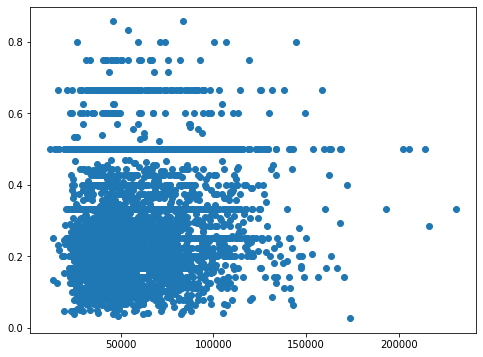

In [186]:
plt.figure(figsize=(8,6))
plt.scatter(household_income,percent_deactivated)

In [187]:
perc_by_state = {}
deactivated_subscribers=subscribers[subscribers.status.isnull()]
active_subscribers=subscribers[subscribers.status.notnull()]
active_subscribers
tot_deactivated_by_state = {}
tot_active_by_state = {}
for state, deactivated_count in deactivated_subscribers['subscriber_state'].value_counts().iteritems():
    if len(active_subscribers[active_subscribers['subscriber_state'] == state])!=0:
        active_subscriber_count= active_subscribers[active_subscribers['subscriber_state']==state]['subscriber_state'].value_counts().iloc[0]
        percentage = deactivated_count /(active_subscriber_count+deactivated_count)
        perc_by_state[state]=percentage
        tot_deactivated_by_state[state]=deactivated_count
        tot_active_by_state[state]=active_subscriber_count

In [188]:
sorted_states_by_deactivated_percentage = sorted(perc_by_state.items(), key=lambda kv: kv[1])
sorted_states_by_deactivated_percentage

[('Iowa', 0.10843373493975904),
 ('Rhode Island', 0.1111111111111111),
 ('Oklahoma', 0.1141552511415525),
 ('Massachusetts', 0.12195121951219512),
 ('Maryland', 0.12922465208747516),
 ('District of Columbia', 0.12941176470588237),
 ('Nebraska', 0.13333333333333333),
 ('Michigan', 0.1468189233278956),
 ('Georgia', 0.14770797962648557),
 ('Delaware', 0.15625),
 ('Ohio', 0.15903614457831325),
 ('Hawaii', 0.16129032258064516),
 ('Nevada', 0.16692913385826771),
 ('Alabama', 0.17083333333333334),
 ('Kentucky', 0.1732283464566929),
 ('West Virginia', 0.175),
 ('Alaska', 0.1751412429378531),
 ('Wisconsin', 0.19389002036659878),
 ('Missouri', 0.19900990099009902),
 ('New York', 0.20049361207897792),
 ('Idaho', 0.20588235294117646),
 ('Florida', 0.20675944333996024),
 ('Pennsylvania', 0.20735785953177258),
 ('Montana', 0.20981713185755535),
 ('Texas', 0.21301720130172014),
 ('Louisiana', 0.21602373887240356),
 ('Virginia', 0.221875),
 ('North Carolina', 0.22202014549524343),
 ('South Dakota', 0.

In [189]:
pd.DataFrame(subscribers.groupby(['subscriber_state', 'subscriber_status'])['subscriber_id'].count()).reset_index()

,subscriber_state,subscriber_status,subscriber_id
0,Alabama,activated,398
1,Alabama,deactivated,82
2,Alaska,activated,292
3,Alaska,deactivated,62
4,Arizona,activated,7501
5,Arizona,deactivated,2377
6,Arkansas,activated,29
7,Arkansas,deactivated,9
8,California,activated,6006
9,California,deactivated,1742


In [190]:
subscribers['full_status'] = np.where((subscribers['subscriber_status'] == 'activated') | (subscribers['subscriber_status'] == 'pending'), 'activated', subscribers['subscriber_deactivation_method'])

In [191]:
pd.DataFrame(subscribers.groupby(['subscriber_state', 'full_status'])['subscriber_id'].count()).reset_index()

,subscriber_state,full_status,subscriber_id
0,Alabama,Age Out,2
1,Alabama,STOP,79
2,Alabama,Signup not Completed,1
3,Alabama,activated,398
4,Alaska,STOP,62
5,Alaska,activated,292
6,Arizona,Age Out,27
7,Arizona,Deactivated by Admin,2
8,Arizona,Invalid Phone,1
9,Arizona,STOP,2302


In [203]:
subscribers['stops'] = np.where((subscribers['full_status'] == 'STOP'), 'stopped', None)

In [228]:
perc_by_zip = {}
stopped_subscribers=subscribers[subscribers.stops.notnull()]
active_subscribers=subscribers[subscribers.stops.isnull()]
tot_stopped_by_zip = {}
tot_active_by_zip = {}
for zipcode, deactivated_count in stopped_subscribers['subscriber_zip_code'].value_counts().iteritems():
    if len(active_subscribers[active_subscribers['subscriber_zip_code'] == zipcode])!=0:
        active_subscriber_count= active_subscribers[active_subscribers['subscriber_zip_code']==zipcode]['subscriber_zip_code'].value_counts().iloc[0]
        percentage = stopped_count /(active_subscriber_count+stopped_count)
        perc_by_zip[int(zipcode)]=percentage
        tot_stopped_by_zip[int(zipcode)]=stopped_count
        tot_active_by_zip[int(zipcode)]=active_subscriber_count

In [234]:
sorted_zipcodes_by_stopped_percentage = sorted(perc_by_zip.items(), key=lambda kv: kv[1])
pd.DataFrame(sorted_zipcodes_by_stopped_percentage).reset_index().to_csv('/Users/nehaverma/Documents/delta-analytics/BBT/stopped_by_state', index=False)

In [213]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)
household_income= []
percent_stopped = []
for zipcode, percentage in sorted_zipcodes_by_deactivated_percentage:
    z = search.by_zipcode(zipcode)
    household_income.append(z.median_household_income)
    percent_stopped.append(percentage)

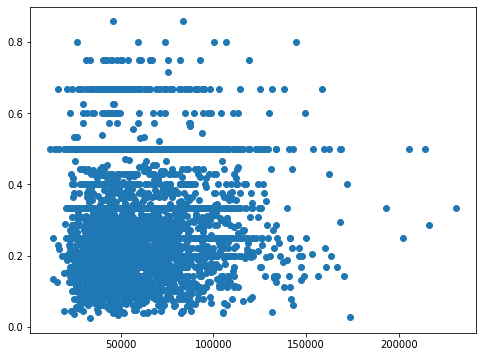

In [214]:
plt.figure(figsize=(8,6))
plt.scatter(household_income,percent_stopped)

In [215]:
perc_by_state = {}
deactivated_subscribers=subscribers[subscribers.stops.isnull()]
active_subscribers=subscribers[subscribers.stops.notnull()]
active_subscribers
tot_deactivated_by_state = {}
tot_active_by_state = {}
for state, deactivated_count in deactivated_subscribers['subscriber_state'].value_counts().iteritems():
    if len(active_subscribers[active_subscribers['subscriber_state'] == state])!=0:
        active_subscriber_count= active_subscribers[active_subscribers['subscriber_state']==state]['subscriber_state'].value_counts().iloc[0]
        percentage = deactivated_count /(active_subscriber_count+deactivated_count)
        perc_by_state[state]=percentage
        tot_deactivated_by_state[state]=deactivated_count
        tot_active_by_state[state]=active_subscriber_count

In [216]:
sorted_states_by_stopped_percentage = sorted(perc_by_state.items(), key=lambda kv: kv[1])
sorted_states_by_stopped_percentage

[('Kansas', 0.6304347826086957),
 ('North Dakota', 0.6363636363636364),
 ('Utah', 0.6766917293233082),
 ('Maine', 0.6875),
 ('Colorado', 0.7366616040370388),
 ('Minnesota', 0.7407407407407407),
 ('New Hampshire', 0.75),
 ('Connecticut', 0.7545871559633027),
 ('Illinois', 0.7556675062972292),
 ('Indiana', 0.7609143713696833),
 ('Oregon', 0.7614678899082569),
 ('Arkansas', 0.7631578947368421),
 ('New Jersey', 0.7638588912886969),
 ('Mississippi', 0.7666666666666667),
 ('Arizona', 0.7669568738611054),
 ('Wyoming', 0.7676767676767676),
 ('Tennessee', 0.7699386503067485),
 ('South Carolina', 0.7786259541984732),
 ('New Mexico', 0.7836185819070904),
 ('Washington', 0.7843137254901961),
 ('Virginia', 0.7854166666666667),
 ('California', 0.7873081387849865),
 ('North Carolina', 0.7888919977616117),
 ('Montana', 0.7911453320500481),
 ('Texas', 0.79674569967457),
 ('Louisiana', 0.799406528189911),
 ('Pennsylvania', 0.8001672240802675),
 ('Florida', 0.8011928429423459),
 ('Missouri', 0.8059405940